In [2]:
import random
import matplotlib.pyplot as plt

In [25]:
class Population:

    def __init__(self, n=100):
        self.specimens = {Creature() for _ in range(n)}
        self.history = []

        #self.n = n   getter robi to za nas

    @property
    def specimens(self):
        return self._specimens

    @specimens.setter
    def specimens(self, value):
        self._specimens = value
        self.n = len(value)

    def natural_selection(self):   
        # Próbujemy zabić wszystkie stwory (dla każdego odpalamy .kill)
        #for specimen in self.speciemens:
            #specimen.kill()
        newborns = {specimen.reproduce() for specimen in self.specimens} - {None}
        {specimen.kill() for specimen in self.specimens}
        
        # Zapisujemy gdzieś poprzedni stan populacji (n)
        
        self.history.append(self.n)
        
        # Usuwamy z populacji zabite stwory
        
        self.specimens = {specimen for specimen in self.specimens
                          if specimen.alive} | newborns

    def plot_history(self):
        plt.plot(self.history)

    def plot_histogram(self, parameter): # parameter = 'p+death', na przykład
        # self.specimens to jest zbiór stworów a każdy stwór ma swoje p_death
        # z każdego stwora biorę jego "śmietelność" -> zbiór śmiertelności 
        # i ten zbiór śmiertelności wizualizuje na histogramie
        
        plt.hist([getattr(specimen, parameter) for specimen in self.specimens])


class Probability:

    def __set_name__(self, owner, name): # name = 'p_death' albo 'p_reproduce'
        # self.public_name = name 
        self.private_name = '_' + name

    def __get__(self, obj, objtype=None): # będizemy odczytywać wartość zapisaną gdzie indziej
        # Wartość będize zapisana w _p_death
        return getattr(obj,self.private_name) # Zamiast _p_death tu powinna być dowolna nazwa (np. p_reproduce). 
                                              # Tu używamy self.private_name, który jest str

    def __set__(self, obj, value): # tutaj chcemy pinować właściwych wartości ( 0 =<value =< 1)
        setattr(obj, self.private_name, min(1, max(0, value))) # Tu też
        
        #if value < 0:
        #    obj._p_death = 0
        #elif value > 1:
        #    obj._p_death = 1
        #else:
        #    obj._p_death = value


class Creature:

    sigma = 0.02
    p_death = Probability()
    p_reproduce = Probability()
    
    alive = True  # Atrybut
    
    def __init__(self, p_death=0.2, p_reproduce=0.2):
        self.p_death = p_death
        self.p_reproduce = p_reproduce
        self.alive = True
    
    def kill(self):  # Metoda
        if random.random() <= self.p_death:
            self.alive = False
            
    def reproduce(self):  
        if random.random() <= self.p_reproduce and self.alive: 
            return Creature(p_death = self.p_death + random.gauss(mu=0, sigma=Creature.sigma),
                            p_reproduce = self.p_reproduce + random.gauss(mu=0, sigma=Creature.sigma))

In [3]:
meduza = Creature()

In [4]:
meduza.alive

True

In [5]:
meduza.kill()
meduza.alive

True

In [6]:
meduza.kill()
meduza.alive

True

In [7]:
meduza.kill()
meduza.alive

True

In [8]:
meduza.kill()
meduza.alive

True

In [9]:
meduza.kill()
meduza.alive

True

In [10]:
meduza.kill()
meduza.alive

True

In [11]:
meduza.kill()
meduza.alive

False

In [12]:
meduza.reproduce() 

In [13]:
meduza.reproduce() 

In [14]:
meduza.reproduce() 

In [15]:
meduza.reproduce() 

In [26]:
population = Population()

In [27]:
for _ in range(40):
    population.natural_selection()

In [28]:
population.n

289

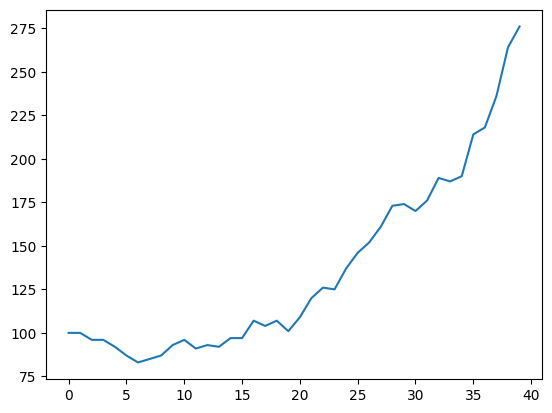

In [29]:
population.plot_history()

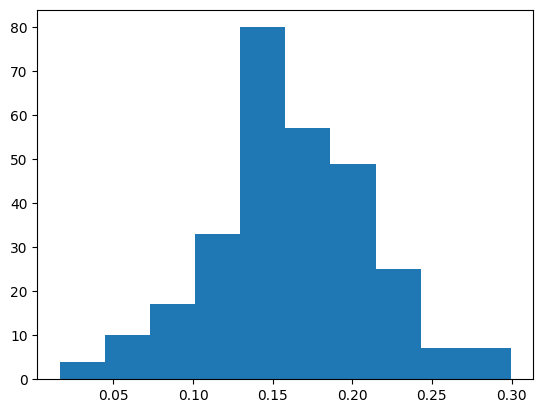

In [30]:
population.plot_histogram('p_death')

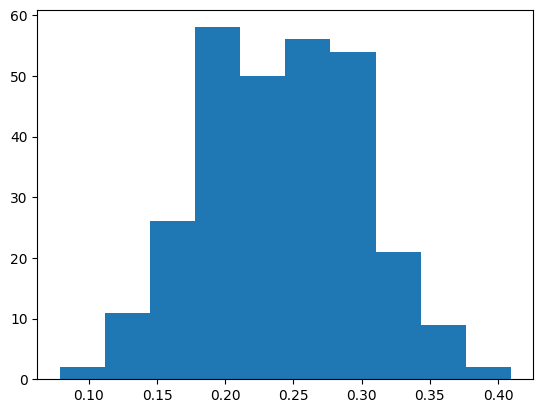

In [31]:
population.plot_histogram('p_reproduce')

In [32]:
my_creature = Creature()

In [33]:
my_creature.p_death

0.2

In [34]:
my_creature.p_death = 500
my_creature.p_death

1